In [15]:
import gym
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [16]:
env = gym.make("MountainCar-v0")
# env.reset()

In [17]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 25000


In [18]:
SHOW_EVERY = 2000

In [19]:
# print(env.observation_space.high)
# print(env.observation_space.low)
# print(env.action_space.n)

In [20]:
DISCRETE_OS_SIZE = [20]  * len(env.observation_space.high)
discrete_os_win_size =(env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE


In [21]:
epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2

epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

In [22]:
# print(discrete_os_win_size)

In [23]:
q_table = np.random.uniform(low=-2,high=0,size=(DISCRETE_OS_SIZE + [env.action_space.n]))
# print(q_table.shape)
# print(q_table)

In [24]:
ep_rewards = []
aggr_ep_rewards = {'ep': [],'avg': [],'min': [], 'max': []}

In [25]:
def get_discrete_state(state):
    discrete_state = (state -env.observation_space.low) / discrete_os_win_size
    return tuple(discrete_state.astype(np.int))

In [26]:
# print(discrete_state)

In [27]:
# print(np.argmax(q_table[discrete_state]))

In [28]:
for episode in range(EPISODES):
    episode_reward = 0
    if episode % SHOW_EVERY == 0:
        print(episode)
        render = True
    else:
        render = False
         
    discrete_state = get_discrete_state(env.reset())
    done =False
    while not done:
        
        
        if np.random.random() > epsilon:
            action =np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)
            
        new_state,reward,done, _ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
        if render:
            env.render()
        if not done:
            max_feature_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q =(1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_feature_q)
            q_table[discrete_state+(action,)] = new_q
        elif new_state[0] >=env.goal_position:
            #print(f"we made it on episode {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state
        
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    
#     if not episode %10:
#         np.save(f"qtables/{episode}-qtable.npy", q_table)
    
    if not episode % SHOW_EVERY:
        
        avarage_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(avarage_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        
        #print(f"Episode:{episode},avg: {average_reward}, min: {min(ep_rewards[-SHOW_EVERY:]},max: {max(ep_rewards[-SHOW_EVERY:])}")
    
    #if episode % SHOW_EVERY == 0:
    
env.close()

0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000


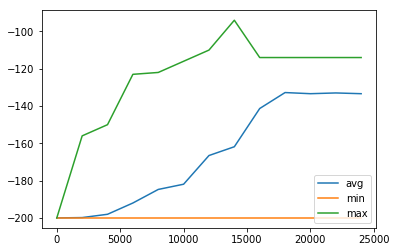

In [29]:
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['avg'],label = "avg")
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['min'],label = "min")
plt.plot(aggr_ep_rewards['ep'],aggr_ep_rewards['max'],label = "max")
plt.legend(loc=4)
plt.show()